In [23]:
"""

This code will filter through the movies data set and extract only movies released in 2016. 
From these movies it grabs the following information and stores them in a DataFrame...

budget, release_date, revenue, title

The last row, Gross revenue, is added by iterating over the rows and calculating (revenue - budget)

"""


import pandas as pd
data = pd.read_csv('movies_metadata.csv', header = 'infer')
cnt = 0

headers = list(data.columns.values)

new_rows = []
for index, row in data.iterrows():
    year = str(row['release_date'])[0:4]
    if year == '2016':
        new_rows.append(row)
        
movies = pd.DataFrame(new_rows, columns = headers) #get only movies released in 2016



col_list = ['budget', 'genres', 'title', 'release_date', 'revenue', 'id']

movies.drop(movies.columns.difference(col_list), 1, inplace=True) # get only desired columns

gross = []
genre = []
ids = []
for index, row in movies.iterrows():
    budget = int(row['budget'])
    revenue = int(row['revenue'])
    gross_revenue = revenue-budget
    gross.append(gross_revenue)
    genres = row['genres']
    i_d = row['id']
    
    
    index = genres.find('name')
    if index != -1:
        genres = genres[index+8:]
        close = genres.find("'")
        main_genre = genres[:close]
        genre.append(main_genre)
    else:
        genre.append(None)
    ids.append(str(i_d))

    
movies['gross_revenue'] = gross
movies['genres'] = genre
movies['id'] = ids

movies[0:8]

/Users/allisonlollo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,budget,genres,id,release_date,revenue,title,gross_revenue
22325,0,Comedy,194188,2016-02-11,0.000000e+00,Punk's Dead: SLC Punk 2,0
23634,0,None,295958,2016-07-15,0.000000e+00,Sound of Redemption: The Frank Morgan Story,0
25216,0,Thriller,307087,2016-05-17,0.000000e+00,The Ghost and the Whale,0
26556,100000000,Adventure,271969,2016-08-17,9.406131e+07,Ben-Hur,-5938689
26557,160000000,Action,68735,2016-05-25,4.336772e+08,Warcraft,273677183
26564,58000000,Action,293660,2016-02-09,7.831130e+08,Deadpool,725112979
26567,250000000,Adventure,271110,2016-04-27,1.153304e+09,Captain America: Civil War,903304495
26568,165000000,Action,284052,2016-10-25,6.777184e+08,Doctor Strange,512718395


In [24]:
"""

this code reades from another file credits.csv that contains more information needed 

Main actor
Director

"""

awards = pd.read_csv('credits.csv', header = 'infer')

ids = []
actors = []
directors = []
for index,row in awards.iterrows():
    cnt+=1
    r = row['cast']
    if r == "[]":
        continue
    i = r.find('}')
    r = r[1:i+1]
    r = r.strip("}").strip("{")
    
    r = r.split(',')
    if r[5].find('name') == -1:
        continue
    
    act = r[5].split(':')[1].strip().strip("'")
    i_d = row['id']
    
    direct = row['crew']
    ind = direct.find("'job': 'Director'")
    if ind == -1:
        continue
    
    direct = direct[ind+28:]
    end = direct.find("'")
    
    director = direct[:end]
    
    
    ids.append(str(i_d))
    actors.append(act)
    directors.append(director)
    

awards2 = pd.DataFrame()
awards2['id'] = ids
awards2['main_actor'] = actors
awards2['director'] = directors

awards2.head()

,id,main_actor,director
0,862,Tom Hanks,John Lasseter
1,8844,Robin Williams,Joe Johnston
2,15602,Walter Matthau,Howard Deutch
3,31357,Whitney Houston,Forest Whitaker
4,11862,Steve Martin,Charles Shyer


In [25]:
"""

This code takes the 2 tables and combines them on the condition that the ID's are the same

This gives one larger data frame with all the data combined

"""

all_movies_data = pd.merge(movies, awards2, how='inner', left_on = 'id', right_on = 'id')
all_movies_data.head()

,budget,genres,id,release_date,revenue,title,gross_revenue,main_actor,director
0,0,Comedy,194188,2016-02-11,0.000000e+00,Punk's Dead: SLC Punk 2,0,Ben Schnetzer,James Merendino
1,100000000,Adventure,271969,2016-08-17,9.406131e+07,Ben-Hur,-5938689,Jack Huston,Timur Bekmambetov
2,160000000,Action,68735,2016-05-25,4.336772e+08,Warcraft,273677183,Paula Patton,Duncan Jones
3,58000000,Action,293660,2016-02-09,7.831130e+08,Deadpool,725112979,Ryan Reynolds,Tim Miller
4,250000000,Adventure,271110,2016-04-27,1.153304e+09,Captain America: Civil War,903304495,Chris Evans,Anthony Russo


In [26]:
"""

This code pulls in the third file IMDB-Movie-Data.csv that gives the attribute we are trying to predict

The imdb rating of the movie

It filters through the data collecting only movies released in the 2016 and collects

title, rating, and number of votes

"""

data = pd.read_csv('IMDB-Movie-Data.csv', header = 'infer')


headers = list(data.columns.values)

new_rows = []
cnt = 0
for index, row in data.iterrows():
    year = str(row['Year'])
    if year == '2016':
        new_rows.append(row)
        cnt +=1
        
imbd = pd.DataFrame(new_rows, columns = headers) #get only movies released in 2016
imbd.head()


col_list = ['Title', 'Rating', 'Votes']

imbd.drop(imbd.columns.difference(col_list), 1, inplace=True) # get only desired columns

imbd.head()

,Title,Rating,Votes
2,Split,7.3,157606
3,Sing,7.2,60545
4,Suicide Squad,6.2,393727
5,The Great Wall,6.1,56036
6,La La Land,8.3,258682


In [27]:
"""

this code once again combines 2 tables together, the imdb rating table and the movie list table 

to create one large table

"""

all_data = pd.merge(all_movies_data, imbd, how='inner', left_on = 'title', right_on = 'Title')
all_data.head()

,budget,genres,id,release_date,revenue,title,gross_revenue,main_actor,director,Title,Rating,Votes
0,100000000,Adventure,271969,2016-08-17,9.406131e+07,Ben-Hur,-5938689,Jack Huston,Timur Bekmambetov,Ben-Hur,5.7,28326
1,160000000,Action,68735,2016-05-25,4.336772e+08,Warcraft,273677183,Paula Patton,Duncan Jones,Warcraft,7.0,187547
2,58000000,Action,293660,2016-02-09,7.831130e+08,Deadpool,725112979,Ryan Reynolds,Tim Miller,Deadpool,8.0,627797
3,250000000,Adventure,271110,2016-04-27,1.153304e+09,Captain America: Civil War,903304495,Chris Evans,Anthony Russo,Captain America: Civil War,7.9,411656
4,165000000,Action,284052,2016-10-25,6.777184e+08,Doctor Strange,512718395,Benedict Cumberbatch,Scott Derrickson,Doctor Strange,7.6,293732


In [28]:
"""

this code pulls in the final csv file, awards.csv that contains information on 
"Academy Awards Oscars: Nominees and Winners 1927 to Present"

This will keep a count of how many times the director or main actor for each movie has won an academy award

it then adds these 2 new columns to our large dataframe

"""


awards = pd.read_csv('awards.csv', header = 'infer')

awards.head()

actor_awards = []
director_awards = []
for index,row in all_data.iterrows():
    main_actor = row['main_actor']
    director = row['director']
    act_cnt = 0
    dirct_cnt = 0
    for index2,row2 in awards.iterrows():
        name = row2['entity']
        outcome = row2['winner']
        if director.lower().strip() == name.lower().strip():
            dirct_cnt += 1
        if main_actor.lower().strip() == name.lower().strip():
            act_cnt += 1
    actor_awards.append(act_cnt)
    director_awards.append(dirct_cnt)
    
all_data['main_actor_award_cnt'] = actor_awards
all_data['director_award_cnt'] = director_awards

all_data[0:10]

,budget,genres,id,release_date,revenue,title,gross_revenue,main_actor,director,Title,Rating,Votes,main_actor_award_cnt,director_award_cnt
0,100000000,Adventure,271969,2016-08-17,9.406131e+07,Ben-Hur,-5938689,Jack Huston,Timur Bekmambetov,Ben-Hur,5.7,28326,0,0
1,160000000,Action,68735,2016-05-25,4.336772e+08,Warcraft,273677183,Paula Patton,Duncan Jones,Warcraft,7.0,187547,0,0
2,58000000,Action,293660,2016-02-09,7.831130e+08,Deadpool,725112979,Ryan Reynolds,Tim Miller,Deadpool,8.0,627797,0,0
3,250000000,Adventure,271110,2016-04-27,1.153304e+09,Captain America: Civil War,903304495,Chris Evans,Anthony Russo,Captain America: Civil War,7.9,411656,0,0
4,165000000,Action,284052,2016-10-25,6.777184e+08,Doctor Strange,512718395,Benedict Cumberbatch,Scott Derrickson,Doctor Strange,7.6,293732,1,0
5,178000000,Science Fiction,246655,2016-05-18,5.439348e+08,X-Men: Apocalypse,365934787,James McAvoy,Bryan Singer,X-Men: Apocalypse,7.1,275510,0,0
6,18000000,Adventure,245703,2016-02-18,6.212282e+06,Midnight Special,-11787718,Michael Shannon,Jeff Nichols,Midnight Special,6.7,54787,2,0
7,110000000,Adventure,262504,2016-03-09,1.792469e+08,Allegiant,69246868,Shailene Woodley,Robert Schwentke,Allegiant,5.7,70504,0,0
8,180000000,Adventure,259316,2016-11-16,8.093423e+08,Fantastic Beasts and Where to Find Them,629342332,Eddie Redmayne,David Yates,Fantastic Beasts and Where to Find Them,7.5,232072,2,0
9,75000000,Animation,328111,2016-06-18,8.754579e+08,The Secret Life of Pets,800457937,Louis C.K.,Chris Renaud,The Secret Life of Pets,6.6,120259,0,0


In [29]:
all_data = all_data.drop('release_date',axis=1)
all_data = all_data.drop('main_actor',axis=1)
all_data = all_data.drop('director',axis=1)
all_data = all_data.drop('Title',axis=1)
all_data = all_data.drop('title',axis=1)
all_data = all_data.drop('id',axis=1)
all_data = all_data.drop('revenue',axis=1)

all_data.head()


,budget,genres,gross_revenue,Rating,Votes,main_actor_award_cnt,director_award_cnt
0,100000000,Adventure,-5938689,5.7,28326,0,0
1,160000000,Action,273677183,7.0,187547,0,0
2,58000000,Action,725112979,8.0,627797,0,0
3,250000000,Adventure,903304495,7.9,411656,0,0
4,165000000,Action,512718395,7.6,293732,1,0


In [30]:
"""

need to encode the genres column because you can't have strings in the regression analysis

"""
all_data = pd.concat([all_data,pd.get_dummies(all_data['genres'], prefix='genre')],axis=1)
all_data.drop('genres', axis = 1)


,budget,gross_revenue,Rating,Votes,main_actor_award_cnt,director_award_cnt,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,...,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Mystery,genre_Romance,genre_Science Fiction,genre_Thriller,genre_War
0,100000000,-5938689,5.7,28326,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,160000000,273677183,7.0,187547,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,58000000,725112979,8.0,627797,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250000000,903304495,7.9,411656,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,165000000,512718395,7.6,293732,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,178000000,365934787,7.1,275510,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,18000000,-11787718,6.7,54787,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,110000000,69246868,5.7,70504,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,180000000,629342332,7.5,232072,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,75000000,800457937,6.6,120259,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
all_data = all_data.drop('genres', axis=1)
all_data.head()


,budget,gross_revenue,Rating,Votes,main_actor_award_cnt,director_award_cnt,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,...,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Mystery,genre_Romance,genre_Science Fiction,genre_Thriller,genre_War
0,100000000,-5938689,5.7,28326,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,160000000,273677183,7.0,187547,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,58000000,725112979,8.0,627797,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250000000,903304495,7.9,411656,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,165000000,512718395,7.6,293732,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
"""

this code will begin the predictive modeling portion 

"""

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


"""

model using linear regression from sklearn

"""

Y = all_data['Rating']
X = all_data.drop('Rating', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3 , random_state=1)


# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred_test = regr.predict(X_test)


#model evaluation
print("Root mean squared error = %.4f" %  np.sqrt(mean_squared_error(y_test, y_pred_test) ))
print("R-square = %.4f" % r2_score(y_test, y_pred_test) )
print('Slope Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)



Root mean squared error = 0.8439
R-square = 0.2626
Slope Coefficients: [-7.16293105e-10  6.63550529e-10  4.40784496e-06  5.11057870e-02
 -1.70606049e-02 -3.97369970e-01 -1.13185559e-01  7.88338885e-02
  2.19856237e-02  2.37723113e-01  5.17597936e-01 -2.49886092e-01
 -3.45363247e-01  3.50815684e-01 -4.19697207e-01 -6.93929652e-02
  1.21476121e-01 -3.10056798e-01 -1.69265795e-01  7.45785264e-01]
Intercept: 6.0803353840325505


In [34]:
coefficients = pd.concat([pd.DataFrame(all_data.columns),pd.DataFrame(np.transpose(regr.coef_))], axis = 1)
coefficients

,0,0
0,budget,-7.162931e-10
1,gross_revenue,6.635505e-10
2,Rating,4.407845e-06
3,Votes,5.110579e-02
4,main_actor_award_cnt,-1.706060e-02
5,director_award_cnt,-3.973700e-01
6,genre_Action,-1.131856e-01
7,genre_Adventure,7.883389e-02
8,genre_Animation,2.198562e-02
9,genre_Comedy,2.377231e-01


Text(0, 0.5, 'Predicted values for y')

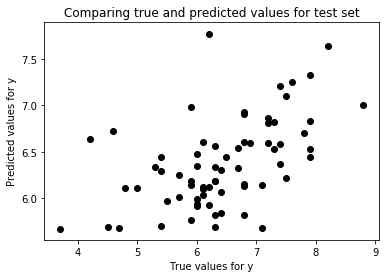

In [35]:
#plot outputs
plt.scatter(y_test,y_pred_test,color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')